In [63]:
#Requried Import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [64]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [65]:
# Preprocess the data
data = data.drop(['id'], axis=1) # Remove the 'id' column
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data = data.drop(['gender'], axis=1) # Remove the original 'gender' column
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')], axis=1)
data = data.drop(['ever_married'], axis=1) # Remove the original 'ever_married' column
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')], axis=1)
data = data.drop(['work_type'], axis=1) # Remove the original 'work_type' column
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='residence_type')], axis=1)
data = data.drop(['Residence_type'], axis=1) # Remove the original 'Residence_type' column
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')], axis=1)
data = data.drop(['smoking_status'], axis=1) # Remove the original 'smoking_status' column
data = data.dropna() # Remove rows with missing values

In [66]:
# Handle missing values
imputer = SimpleImputer()
data = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [67]:
# Split the dataset into training and testing sets
X = data.drop(['stroke'], axis=1)
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Train the logistic regression model
lr = LogisticRegression(solver='saga', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [69]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [71]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [72]:
# Evaluate the model performance
print(classification_report(y_test, y_pred,zero_division=1))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       1.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.97      0.50      0.48      1022
weighted avg       0.94      0.94      0.91      1022

[[960   0]
 [ 62   0]]


In [79]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [80]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [81]:
# Calculate precision, recall, F1-score, and specificity
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

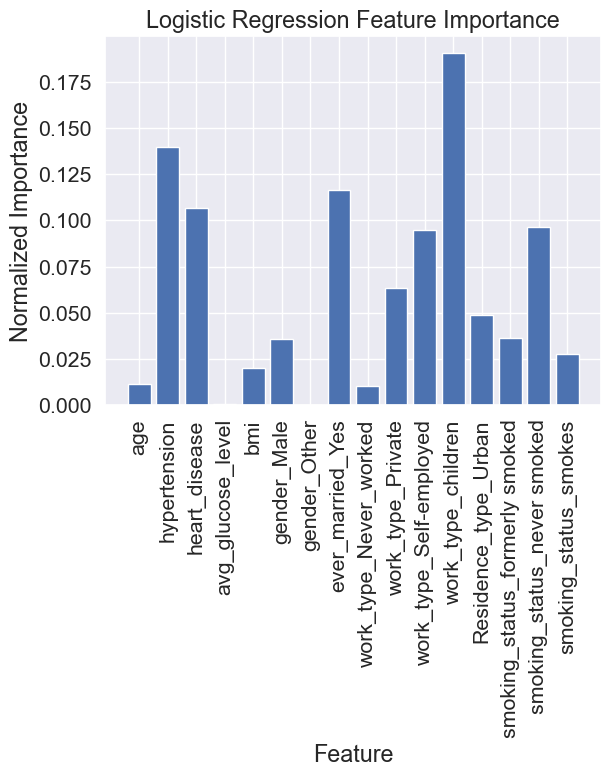

In [85]:
# Plot the important features
feature_importance = abs(lr.coef_[0])
feature_importance_normalized = feature_importance / np.sum(feature_importance)
plt.bar(X.columns, feature_importance_normalized)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Normalized Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

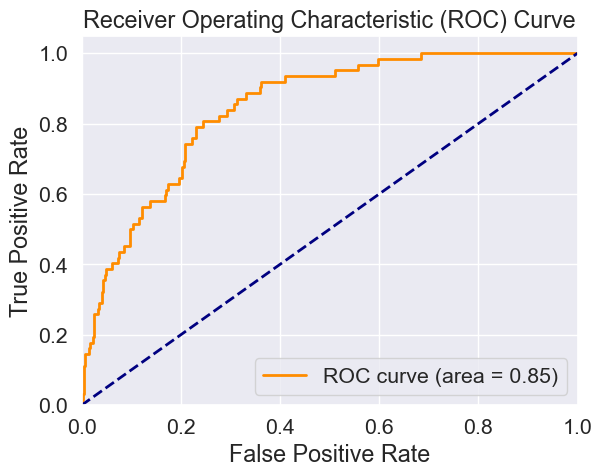

In [76]:
# Plot the ROC curve
y_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

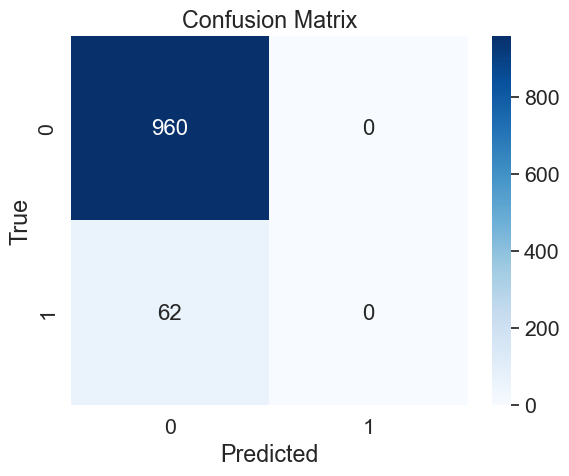

In [77]:
# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [78]:
# Print the performance metrics (logisti)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Accuracy: {(np.trace(cm) / np.sum(cm)):.3f}")

Precision: 1.000
Recall: 0.000
F1-score: 0.000
Specificity: 1.000
Accuracy: 0.939


In [14]:
# Create a decision tree model
model = DecisionTreeClassifier(random_state=42)

In [15]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [17]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
# Calculate precision, recall, F1-score, and specificity
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

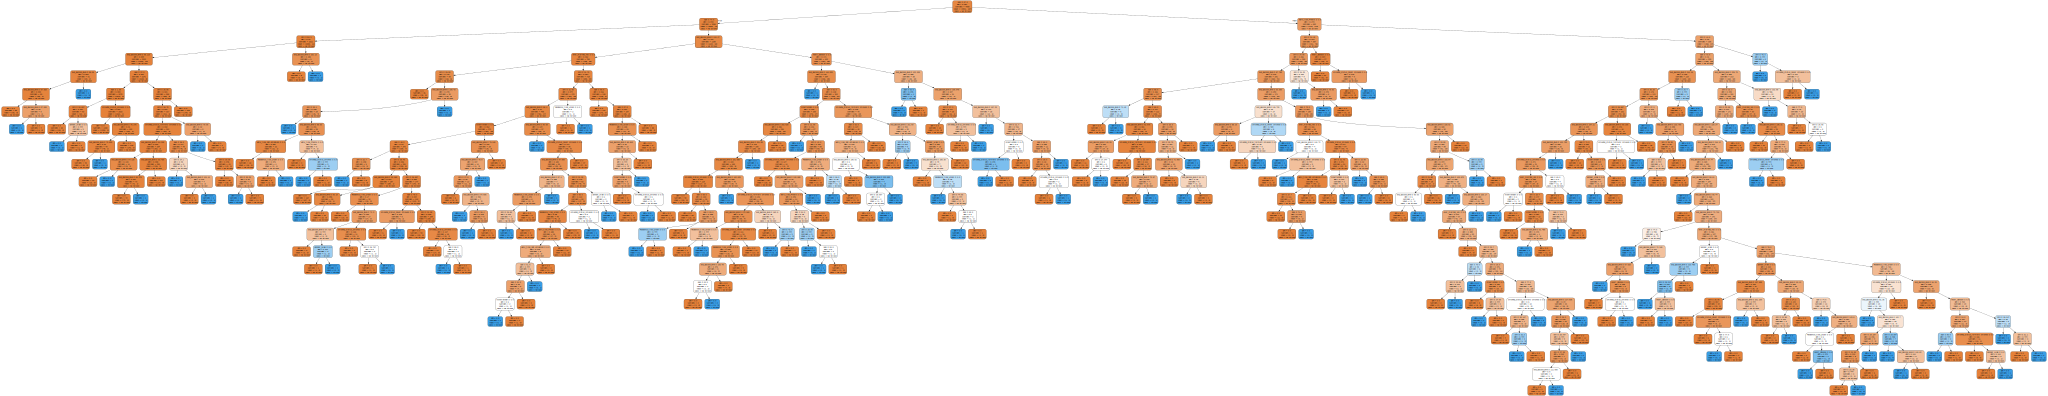

In [19]:
# Visualization of decision tree
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Stroke', 'Stroke'],  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('stroke_decision_tree', format='png')
graph

In [20]:
# Print the performance metrics (decision tree)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"Accuracy: {(np.trace(cm) / np.sum(cm)):.3f}")

Precision: 0.226
Recall: 0.226
F1-score: 0.226
Specificity: 0.950
Accuracy: 0.906
